<h1> Step Four : Feature Engineering and Modelling

<B>Load python packages

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,plot_precision_recall_curve
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier as svm
from sklearn.linear_model import RidgeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
%matplotlib inline

<B>Get Current Working Directory, read file and observe sample rows  

In [2]:
os.getcwd()

'C:\\Users\\Pranay\\Projects\\GitHub\\Capstone_II'

In [3]:
#Read CSV data
df=pd.read_csv('data/step3_output.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,0,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,0,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no


In [4]:
#Get Shape
print(df.shape)

(40554, 18)


In [5]:
#Get data types for all the colums 
print(df.dtypes)
udf=df

age                 int64
job                object
marital            object
education          object
default             int64
housing             int64
loan                int64
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
y                  object
dtype: object


<B>Get all the columns with object datatype excluding dependent column and perform one hot encoding

In [6]:
only_obj=df.select_dtypes(include=['object'])
only_obj.drop(['y'],axis=1,inplace=True)
col=only_obj.columns

C:\Users\Pranay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
#Do One Hot encoding for the objects columns
df=pd.get_dummies(df,columns=col)

In [8]:
#Get updated data types of all the columns
df.dtypes

age                                int64
default                            int64
housing                            int64
loan                               int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
y                                 object
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_divorced                   uint8
marital_married                    uint8
marital_single  

In [9]:
#Transform Dependent Variable values
df.y.replace({'yes':1,'no':0},inplace=True)

<B>Deal with other continuous variables

#Group Age Columns
df['Binned_Age']=pd.cut(
    df['age'],
    bins=[-np.inf,20,30,40,50,60,np.inf],
    labels=['0-20','20-30','30-40','40-50','50-60','60-100']
)

In [10]:
#Group Emp_Var_Rate columns
df['Binned_Emp_Var_Rate']=pd.cut(
    df['emp.var.rate'],
    bins=[-np.inf,-3.5,-2.5,-1.5,-0.5,0.5,1.5,np.inf],
    labels=[-4,-3,-2,-1,0,1,2]
)

In [11]:
#df['euribor3m']=df['euribor3m'].round(1)
df['cons.price.idx']=df['cons.price.idx'].round(2)

<B>Get count details of age group on the basic of product subscribed

iage=list(df.Binned_Age.value_counts().index)
dfyes=df[df['y']==1]

f, (ax1) = plt.subplots(1,1,figsize=(20, 20))
x_1 = pd.DataFrame(df.Binned_Age.value_counts()).reindex(iage, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.Binned_Age)
x_2 = pd.DataFrame(dfyes.Binned_Age.value_counts()).reindex(iage, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.Binned_Age)
ax1.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax1.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax1)
splot.set(xlabel= 'Binned_Age', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')


df=pd.get_dummies(df,columns=['Binned_Age'])
#Get updated Shape
print(df.shape)

<B> As our data is ready and can we used for modelling purpose, divide the data in traing data and testing data

In [12]:
X=df.drop(['y','emp.var.rate'], axis=1)
y=df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

<H3><B>Fit the Data without scaling the data and check the accuracy</B></H3> 
<ul><li>Random Forest(As Random Forest does not depends on scaling of the data)
    <li>KNN
    <li>Logistic Regression 

<B>Random Forest(Unscaled Data)

In [13]:
#Fit Random Forest Algorithm on Training Data
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
#Predict the result for testing data
y_pred=rand_clf.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Random Forest 0.8960449748495907


In [14]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Random Forest\n',cm)

Confusion Matrix without scaling the data and using Random Forest
 [[8753  263]
 [ 791  332]]


In [15]:
print('Classifiaction Report without scaling the data and using Random Forest\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Random Forest
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9016
           1       0.56      0.30      0.39      1123

    accuracy                           0.90     10139
   macro avg       0.74      0.63      0.66     10139
weighted avg       0.88      0.90      0.88     10139



<B> KNN(Unscaled Data)

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('Accuracy Score without scaling the data and using KNN',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using KNN 0.8946641680639116


In [17]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using KNN\n',cm)

Confusion Matrix without scaling the data and using KNN
 [[8752  264]
 [ 804  319]]


In [18]:
print('Classifiaction Report without scaling the data and using KNN\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using KNN
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9016
           1       0.55      0.28      0.37      1123

    accuracy                           0.89     10139
   macro avg       0.73      0.63      0.66     10139
weighted avg       0.88      0.89      0.88     10139



<B>Logistic Regression(Unscaled Data)

In [19]:
lr_clf = LogisticRegression(max_iter=1000)
# Fit the model on the trainng data.
lr_clf.fit(X_train, y_train)
y_pred=lr_clf.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Logistic Regression 0.9009764276555874


In [20]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Logistic Regression\n',cm)

Confusion Matrix without scaling the data and using Logistic Regression
 [[8900  116]
 [ 888  235]]


In [21]:
print('Classifiaction Report without scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9016
           1       0.67      0.21      0.32      1123

    accuracy                           0.90     10139
   macro avg       0.79      0.60      0.63     10139
weighted avg       0.88      0.90      0.88     10139



<B>Get the Roc curve for the results

AUC: 0.8066500555853608


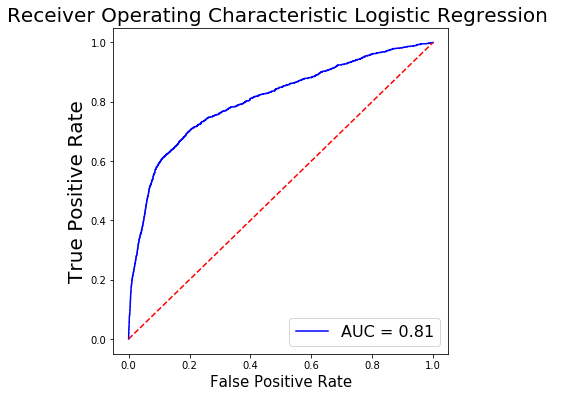

In [22]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))
plt.subplots_adjust(wspace=1)

Logistic: f1=0.319 auc=0.456


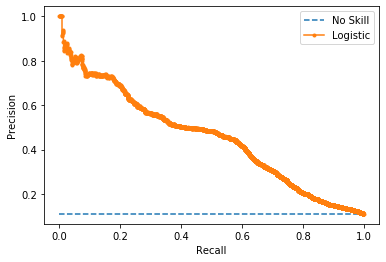

In [23]:
lr_probs=lr_clf.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [24]:
#Adjust the threshold to 0.20
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Logistic Regression with updated threshold',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Logistic Regression with updated threshold 0.8751356149521649


In [25]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Logistic Regression with updated threshold\n',cm)

Confusion Matrix without scaling the data and using Logistic Regression with updated threshold
 [[8242  774]
 [ 492  631]]


In [26]:
print('Classifiaction Report without scaling the data and using Logistic Regression with updated threshold\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Logistic Regression with updated threshold
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      9016
           1       0.45      0.56      0.50      1123

    accuracy                           0.88     10139
   macro avg       0.70      0.74      0.71     10139
weighted avg       0.89      0.88      0.88     10139



<B>For this project it is important to have good recall and F1 score. Therefore there is need to improve recall score</B>

from sklearn.cluster import KMeans
x = df.drop(['Binned_Age','Binned_Emp_Var_Rate','y'], axis=1).values
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

from sklearn.metrics import silhouette_score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x)
    centers = clusterer.cluster_centers_

    score = silhouette_score(x, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

<H3>Scale the Data and then split again</H3>

In [27]:
X = df.drop(['y','emp.var.rate'], axis=1)
y = df.y
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
#Take backup of X_train and y_train
X_train_bkp = X_train
y_train_bkp = y_train
X_test_bkp  = X_test
y_test_bkp  = y_test

<B>Here going forward, X_train and X_test will be our scaled data. For Scaled data, we will be using below algorithms</B>
<ul><li>Random Forest
    <li>KNN
    <li>Logistic Regression 
    <li>SVM   

<B>Random Forest Scaled Data

In [28]:
rand_clf1 = RandomForestClassifier()
rand_clf1.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf1.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print('Random Forest: f1-score=%.3f' % (f1))

Accuracy Score of Random Forest is 0.8961436039057106
Random Forest: f1-score=0.381


In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8762  254]
 [ 799  324]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9016
           1       0.56      0.29      0.38      1123

    accuracy                           0.90     10139
   macro avg       0.74      0.63      0.66     10139
weighted avg       0.88      0.90      0.88     10139



<B>KNN(Scaled Data)

In [31]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
#fit the data
y_pred=knn1.predict(X_test)
print('Accuracy Score scaling the data and using KNN',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print('KNN: f1-score=%.3f' % (f1))

Accuracy Score scaling the data and using KNN 0.8899299733701549
KNN: f1-score=0.378


In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8684  332]
 [ 784  339]]


In [33]:
print('Classification Report after scaling the data and using KNN\n',classification_report(y_test, y_pred))

Classification Report after scaling the data and using KNN
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      9016
           1       0.51      0.30      0.38      1123

    accuracy                           0.89     10139
   macro avg       0.71      0.63      0.66     10139
weighted avg       0.87      0.89      0.88     10139



<B>Logistic Regression with Scaled Data

In [34]:
lr_clf1 = LogisticRegression(max_iter=1000)
# Fit the model on the trainng data.
lr_clf1.fit(X_train, y_train)
y_pred=lr_clf1.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.904428444619785


In [35]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix with scaling the data and using Logistic Regression\n',cm)

Confusion Matrix with scaling the data and using Logistic Regression
 [[8909  107]
 [ 862  261]]


In [36]:
print('Classifiaction Report with scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report with scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9016
           1       0.71      0.23      0.35      1123

    accuracy                           0.90     10139
   macro avg       0.81      0.61      0.65     10139
weighted avg       0.89      0.90      0.88     10139



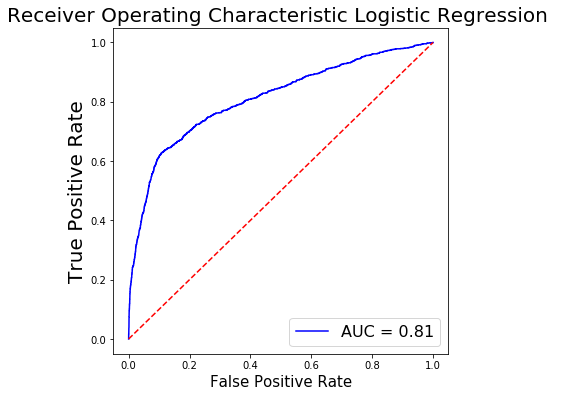

In [37]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf1.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [38]:
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

AUC: 0.8109861680550496


Logistic: f1=0.350 auc=0.485


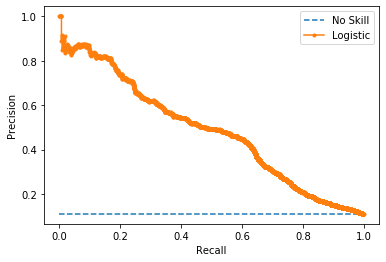

In [39]:
lr_probs=lr_clf1.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [40]:
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after scaling the data and using logistic regression',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print('Logistic Regression: f1-score=%.3f' % (f1))

Accuracy Score by after scaling the data and using logistic regression 0.8733602919420062
Logistic Regression: f1-score=0.513


In [41]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8179  837]
 [ 447  676]]


In [42]:
print('Classification Report after scaling the data and using Logistic regression\n',classification_report(y_test, y_pred))

Classification Report after scaling the data and using Logistic regression
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      9016
           1       0.45      0.60      0.51      1123

    accuracy                           0.87     10139
   macro avg       0.70      0.75      0.72     10139
weighted avg       0.89      0.87      0.88     10139



<B>SVM(Scaled Data)

In [43]:
clf_svm = svm()
clf_svm.fit(X_train, y_train)
y_pred=clf_svm.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.8987079593648288


In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8973   43]
 [ 984  139]]


In [45]:
print('Classifiaction Report with scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report with scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      9016
           1       0.76      0.12      0.21      1123

    accuracy                           0.90     10139
   macro avg       0.83      0.56      0.58     10139
weighted avg       0.89      0.90      0.86     10139



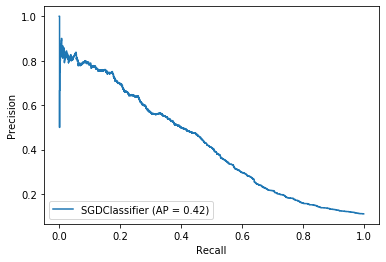

In [46]:
disp=plot_precision_recall_curve(clf_svm, X_test, y_test)


<H3>Still Recall score for "yes" is not improved as expected, Need to check more on improving recall score by trying regularization method</H3> 
<UL><LI>Ridge Regression

<B>Ridge_Regression

In [47]:
ridge=RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
print('Accuracy Score of Ridge Regression is',accuracy_score(y_pred, y_test))

Accuracy Score of Ridge Regression is 0.9026531216096262


In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8914  102]
 [ 885  238]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9016
           1       0.70      0.21      0.33      1123

    accuracy                           0.90     10139
   macro avg       0.80      0.60      0.64     10139
weighted avg       0.89      0.90      0.88     10139



<H3>Still there is need to improve Recall Score and F1 Score for the models. There is need to balance data<H3>    

<B>For Balancing data we will use class weight method. Once done we will use below algorithms
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  
    <li>Ridge Rigression 
    <li>XG Boost

In [50]:
#Balance the class weight
classes=[1,0]
weights = compute_class_weight('balanced', classes, y=y_train)
weights

C:\Users\Pranay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([4.4272198 , 0.56365827])

<B>Random Forest(updated class weight)

In [51]:
rand_clf2= RandomForestClassifier(class_weight={0:0.56365827,1:4.4272198})
rand_clf2.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf2.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))

Accuracy Score of Random Forest is 0.8934806193904724


In [52]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8739  277]
 [ 803  320]]


In [53]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9016
           1       0.54      0.28      0.37      1123

    accuracy                           0.89     10139
   macro avg       0.73      0.63      0.66     10139
weighted avg       0.87      0.89      0.88     10139



51


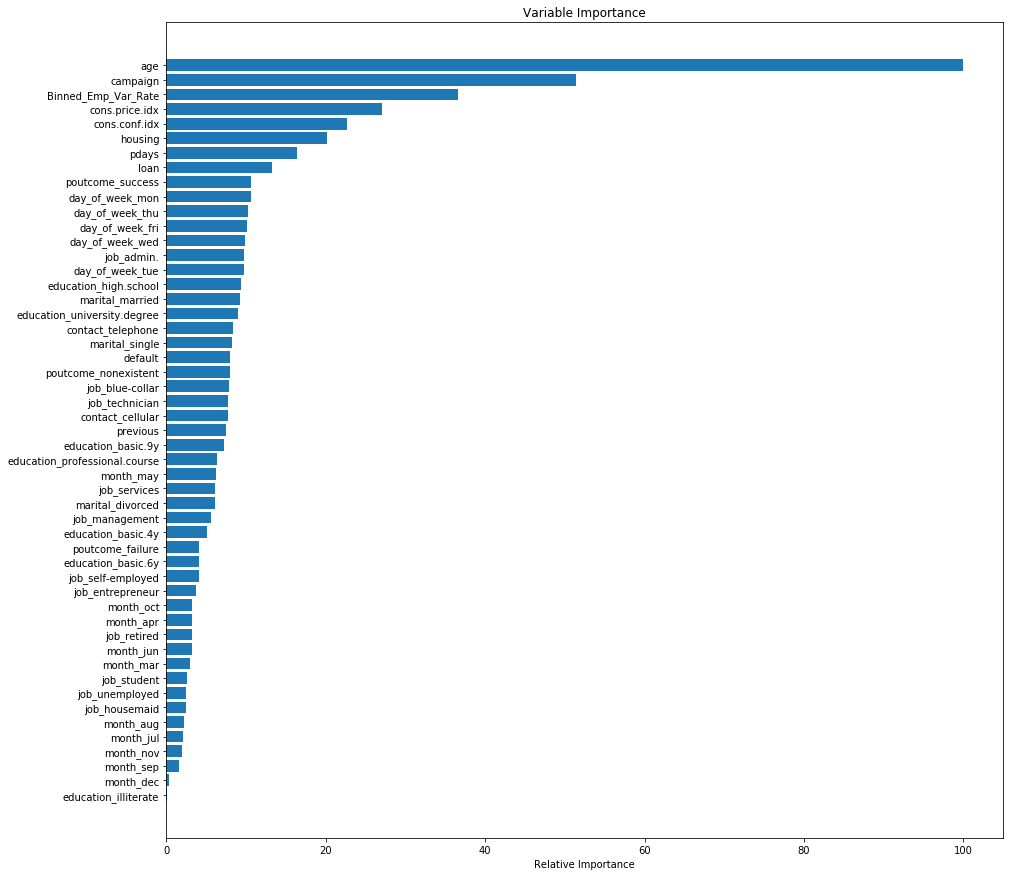

In [54]:
feature_importance = rand_clf2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:59]
sorted_idx = np.argsort(feature_importance)[:59]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<B>Plot ROC Curve for Random Forest

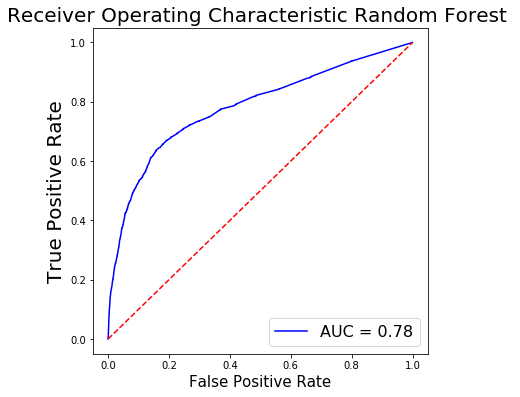

In [55]:
fig, ax = plt.subplots(figsize = (6,6))
probs = rand_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [56]:
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

AUC: 0.7820243975092069


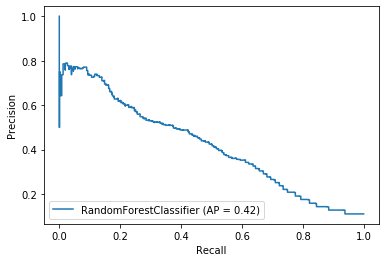

In [57]:
disp=plot_precision_recall_curve(rand_clf2, X_test, y_test)

Logistic: f1=0.372 auc=0.420


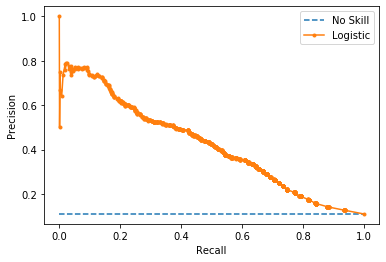

In [58]:
lr_probs=rand_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [59]:
#update the threshold and then predict the value
THRESHOLD = 0.30
#y_pred=clf.predict(X_test)
y_pred=np.where(rand_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Random Forest 0.8740506953348457


In [60]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8323  693]
 [ 584  539]]


In [61]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      9016
           1       0.44      0.48      0.46      1123

    accuracy                           0.87     10139
   macro avg       0.69      0.70      0.69     10139
weighted avg       0.88      0.87      0.88     10139



<B>Logistic Regression (updated class weight) </B>

In [62]:
lr_clf2 = LogisticRegression(class_weight={0:0.56365827,1:4.4272198},max_iter=1000)
# Fit the model on the trainng data.
lr_clf2.fit(X_train, y_train)
y_pred=lr_clf2.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.8247361672748792


In [63]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7612 1404]
 [ 373  750]]


In [64]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.84      0.90      9016
           1       0.35      0.67      0.46      1123

    accuracy                           0.82     10139
   macro avg       0.65      0.76      0.68     10139
weighted avg       0.89      0.82      0.85     10139



51


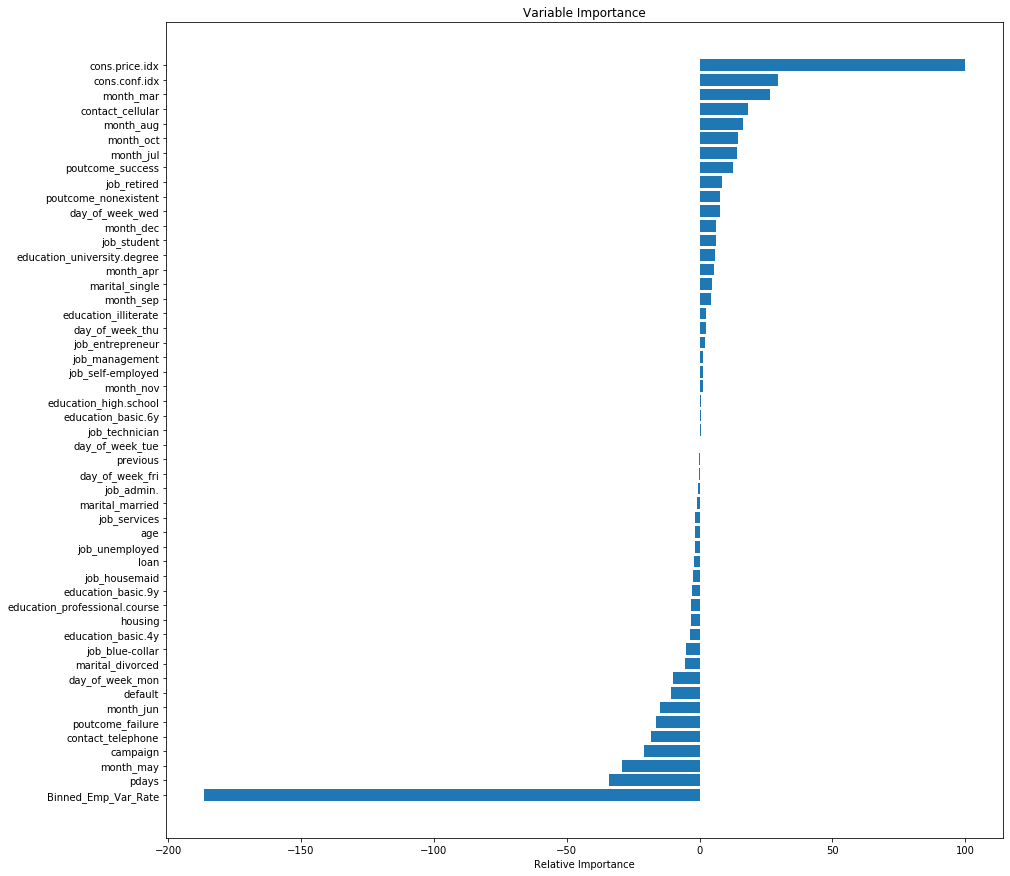

In [65]:
feature_importance = lr_clf2.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:59]
sorted_idx = np.argsort(feature_importance)[:59]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<B>Plot Ruc Curve for Logistic Regression

AUC: 0.8118903684436336


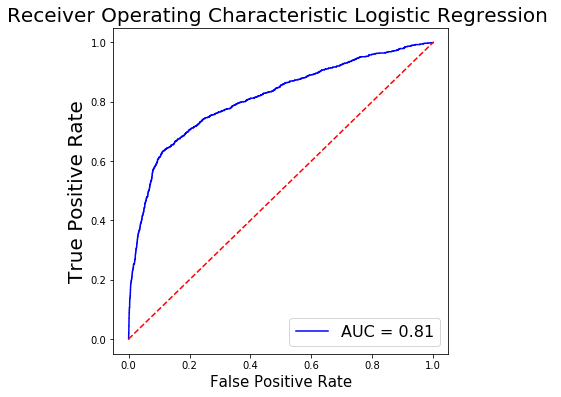

In [66]:
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))
plt.subplots_adjust(wspace=1)

Logistic: f1=0.458 auc=0.481


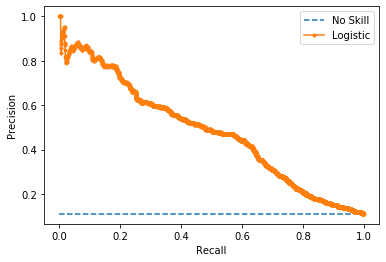

In [67]:
lr_probs=lr_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [68]:
#update the threshold and then predict the value
THRESHOLD = 0.65
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Logistic Regression 0.8719794851563271


In [69]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8171  845]
 [ 453  670]]


In [70]:
print('Classifiaction Report after balancing the data and using Logistic Regression\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      9016
           1       0.44      0.60      0.51      1123

    accuracy                           0.87     10139
   macro avg       0.69      0.75      0.72     10139
weighted avg       0.89      0.87      0.88     10139



<B>SVM (updated class weight) </B>

In [71]:
clf_svm1 = svm(class_weight={0:0.56365827,1:4.4272198})
clf_svm1.fit(X_train, y_train)
y_pred=clf_svm1.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.8054048722753723


In [72]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using SVM\n',cm)

Confusion Matrix after updating class weight and using SVM
 [[7440 1576]
 [ 397  726]]


In [73]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.83      0.88      9016
           1       0.32      0.65      0.42      1123

    accuracy                           0.81     10139
   macro avg       0.63      0.74      0.65     10139
weighted avg       0.88      0.81      0.83     10139



<B>Ridge Rigression (updating class weight)

In [74]:
ridge=RidgeClassifier(class_weight={0:0.56365827,1:4.4272198})
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
print('Accuracy Score of Ridge Regression is',accuracy_score(y_pred, y_test))

Accuracy Score of Ridge Regression is 0.8129993095966072


In [75]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7486 1530]
 [ 366  757]]


In [76]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      9016
           1       0.33      0.67      0.44      1123

    accuracy                           0.81     10139
   macro avg       0.64      0.75      0.67     10139
weighted avg       0.88      0.81      0.84     10139



<B>Use Xgboost by balancing data</B>

In [77]:
from xgboost import XGBClassifier
scale_pos_weight = 26980/3435
gbc = XGBClassifier(scale_pos_weight=scale_pos_weight)

In [78]:
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print('Accuracy Score of Xgboost is',accuracy_score(y_pred, y_test))

Accuracy Score of Xgboost is 0.830949797810435


In [79]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Xgboost\n',cm)

Confusion Matrix after updating class weight and using Xgboost
 [[7675 1341]
 [ 373  750]]


In [80]:
print('Classifiaction Report after balancing the data and using Xgboost\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Xgboost
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      9016
           1       0.36      0.67      0.47      1123

    accuracy                           0.83     10139
   macro avg       0.66      0.76      0.68     10139
weighted avg       0.89      0.83      0.85     10139



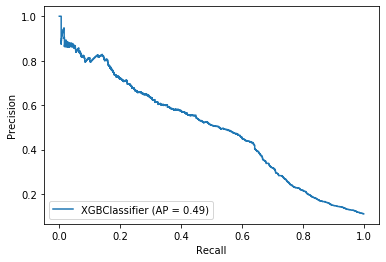

In [81]:
disp=plot_precision_recall_curve(gbc, X_test, y_test)

<B>OverSampling
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  
    <li>Ridge Rigression 
    <li>XG Boost

In [82]:
#In Oversampling size of data gets changed, therefore get initial value counts in y_train and take backup of the values
print(y_train.value_counts())
X_train1=X_train
y_train1=y_train

0    26980
1     3435
Name: y, dtype: int64


In [83]:
#TO balance data, update traing set with SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train,y_train)

In [84]:
#Get updated counts of the data
y_train.value_counts()

1    26980
0    26980
Name: y, dtype: int64

<B>Random Forest (Oversampling)

In [85]:
rand_clf2= RandomForestClassifier()
rand_clf2.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf2.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))

Accuracy Score of Random Forest is 0.8870697307426768


In [86]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

[[8599  417]
 [ 728  395]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      9016
           1       0.49      0.35      0.41      1123

    accuracy                           0.89     10139
   macro avg       0.70      0.65      0.67     10139
weighted avg       0.87      0.89      0.88     10139



51


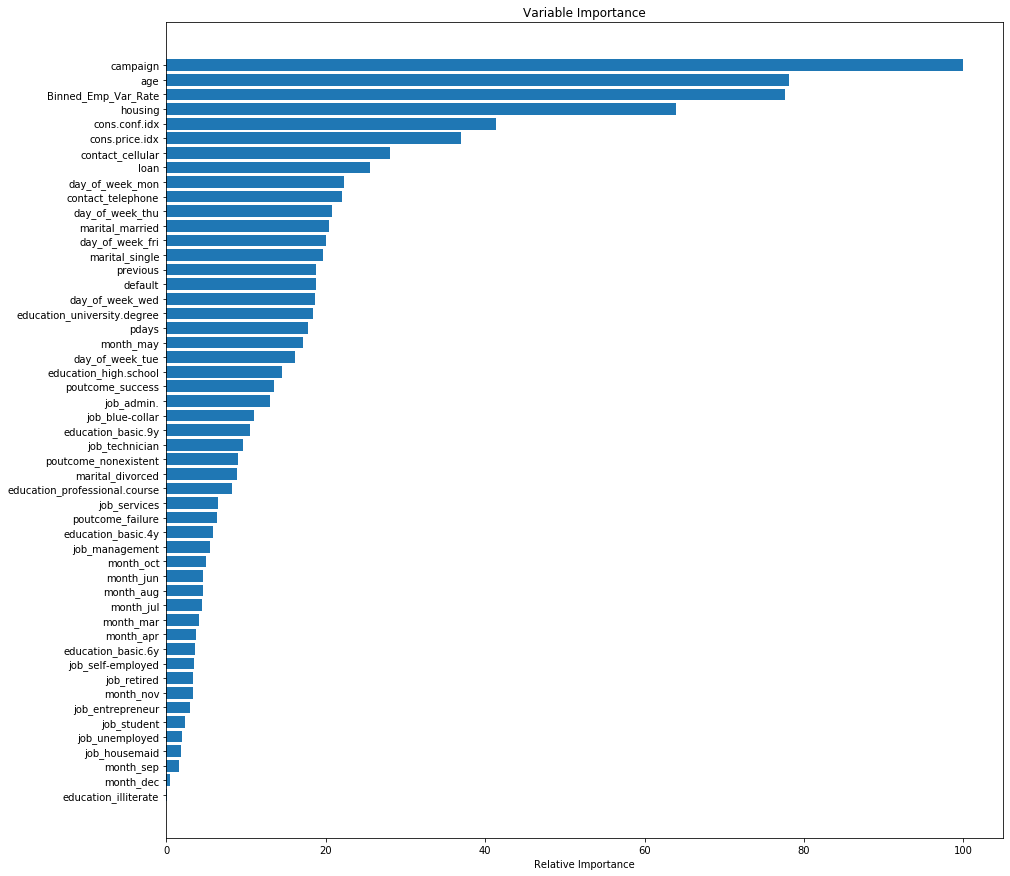

In [87]:
feature_importance = rand_clf2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:59]
sorted_idx = np.argsort(feature_importance)[:59]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

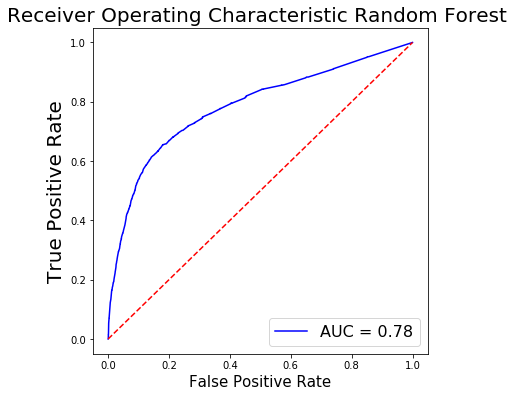

In [88]:
fig, ax = plt.subplots(figsize = (6,6))
probs = rand_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [89]:
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

AUC: 0.7830449439445142


Logistic: f1=0.408 auc=0.404


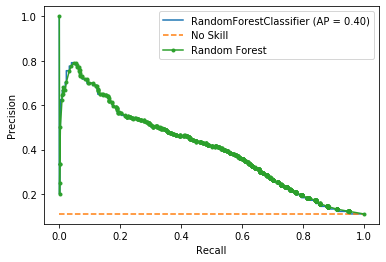

In [90]:
disp=plot_precision_recall_curve(rand_clf2, X_test, y_test)

lr_probs=rand_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [91]:
#update the threshold and then predict the value
THRESHOLD = 0.40
#y_pred=clf.predict(X_test)
y_pred=np.where(rand_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score by after balancing the data and using Random Forest 0.8768123089062038
[[8396  620]
 [ 629  494]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      9016
           1       0.44      0.44      0.44      1123

    accuracy                           0.88     10139
   macro avg       0.69      0.69      0.69     10139
weighted avg       0.88      0.88      0.88     10139



<B>Logistic Regression (Oversampling)

In [92]:
lr_clf2 = LogisticRegression()
# Fit the model on the trainng data.
lr_clf2.fit(X_train, y_train)
y_pred=lr_clf2.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score with scaling the data and using Logistic Regression 0.8125061643160075
Confusion Matrix after updating class weight and using Logistic Regression
 [[7485 1531]
 [ 370  753]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      9016
           1       0.33      0.67      0.44      1123

    accuracy                           0.81     10139
   macro avg       0.64      0.75      0.66     10139
weighted avg       0.88      0.81      0.84     10139



AUC: 0.8086044321325263


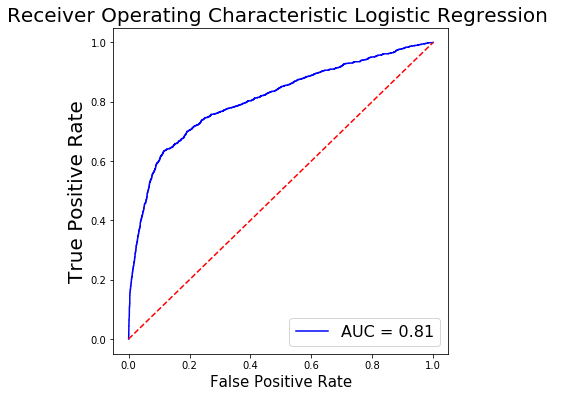

In [93]:
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))
plt.subplots_adjust(wspace=1)

Logistic: f1=0.442 auc=0.480


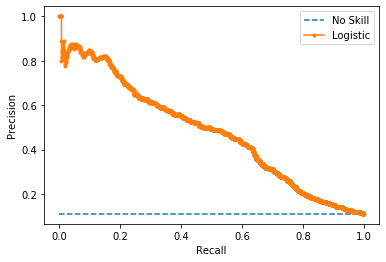

In [94]:
lr_probs=lr_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [95]:
#update the threshold and then predict the value
THRESHOLD = 0.65
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score by after balancing the data and using Random Forest 0.8695137587533287
[[8148  868]
 [ 455  668]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      9016
           1       0.43      0.59      0.50      1123

    accuracy                           0.87     10139
   macro avg       0.69      0.75      0.71     10139
weighted avg       0.89      0.87      0.88     10139



<B>SVM (Oversampling)

In [96]:
clf_svm1 = svm()
clf_svm1.fit(X_train, y_train)
y_pred=clf_svm1.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score of SVM is 0.8091527764079298
Confusion Matrix after updating class weight and using Logistic Regression
 [[7441 1575]
 [ 360  763]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.83      0.88      9016
           1       0.33      0.68      0.44      1123

    accuracy                           0.81     10139
   macro avg       0.64      0.75      0.66     10139
weighted avg       0.88      0.81      0.84     10139



<B>Ridge Regression(Oversampling)

In [97]:
ridge=RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
print('Accuracy Score of Ridge Regression is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data using Oversampling and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score of Ridge Regression is 0.8027418877601341
[[7376 1640]
 [ 360  763]]
Classifiaction Report after balancing the data using Oversampling and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      9016
           1       0.32      0.68      0.43      1123

    accuracy                           0.80     10139
   macro avg       0.64      0.75      0.66     10139
weighted avg       0.88      0.80      0.83     10139



<B>XGBoost (Oversampling)

In [98]:
gbc = XGBClassifier()
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print('Accuracy Score of Xgboost is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Xgboost\n',cm)

print('Classifiaction Report after balancing the data and using Xgboost\n',
      classification_report(y_test, y_pred))

Accuracy Score of Xgboost is 0.8920998126047933
Confusion Matrix after updating class weight and using Xgboost
 [[8562  454]
 [ 640  483]]
Classifiaction Report after balancing the data and using Xgboost
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      9016
           1       0.52      0.43      0.47      1123

    accuracy                           0.89     10139
   macro avg       0.72      0.69      0.70     10139
weighted avg       0.88      0.89      0.89     10139



<H3><B>Undersampling
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  
    <li>Ridge Rigression 
    <li>XG Boost

In [99]:

y_train.value_counts()

1    26980
0    26980
Name: y, dtype: int64

In [100]:
X_train=X_train1
y_train=y_train1
y_train.value_counts()

0    26980
1     3435
Name: y, dtype: int64

In [101]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [102]:
y_train.value_counts()

1    3435
0    3435
Name: y, dtype: int64

<B>Random Forest Classifier (Undersampling)

In [103]:
rand_clf2= RandomForestClassifier()
rand_clf2.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf2.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score of Random Forest is 0.7686162343426374
[[7011 2005]
 [ 341  782]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      9016
           1       0.28      0.70      0.40      1123

    accuracy                           0.77     10139
   macro avg       0.62      0.74      0.63     10139
weighted avg       0.88      0.77      0.81     10139



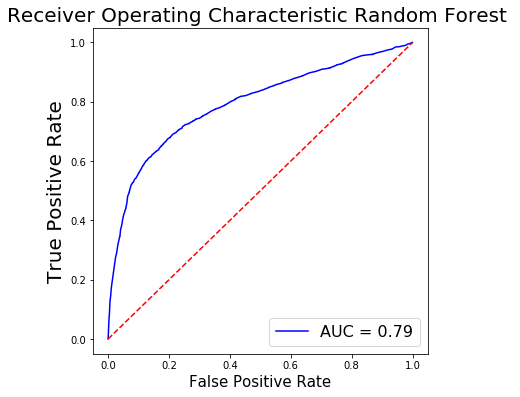

In [104]:
fig, ax = plt.subplots(figsize = (6,6))
probs = rand_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [105]:
#update the threshold and then predict the value
THRESHOLD = 0.60
#y_pred=clf.predict(X_test)
y_pred=np.where(rand_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score by after balancing the data and using Random Forest 0.8277936680145971
[[7694 1322]
 [ 424  699]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      9016
           1       0.35      0.62      0.44      1123

    accuracy                           0.83     10139
   macro avg       0.65      0.74      0.67     10139
weighted avg       0.88      0.83      0.85     10139



<B>Logistic Regression (Undersampling)

In [106]:
lr_clf2 = LogisticRegression()
# Fit the model on the trainng data.
lr_clf2.fit(X_train, y_train)
y_pred=lr_clf2.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score with scaling the data and using Logistic Regression 0.8185225367393234
Confusion Matrix after updating class weight and using Logistic Regression
 [[7545 1471]
 [ 369  754]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      9016
           1       0.34      0.67      0.45      1123

    accuracy                           0.82     10139
   macro avg       0.65      0.75      0.67     10139
weighted avg       0.89      0.82      0.84     10139



AUC: 0.8087714450060484


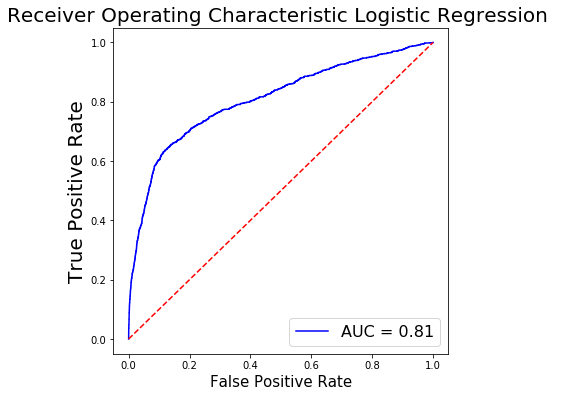

In [107]:
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))
plt.subplots_adjust(wspace=1)

Logistic: f1=0.450 auc=0.479


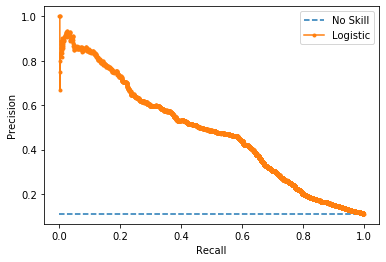

In [108]:
lr_probs=lr_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [109]:
#update the threshold and then predict the value
THRESHOLD = 0.65
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score by after balancing the data and using Random Forest 0.8701055330900483
[[8146  870]
 [ 447  676]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      9016
           1       0.44      0.60      0.51      1123

    accuracy                           0.87     10139
   macro avg       0.69      0.75      0.72     10139
weighted avg       0.89      0.87      0.88     10139



<B>SVM (Undersampling)

In [110]:
clf_svm1 = svm()
clf_svm1.fit(X_train, y_train)
y_pred=clf_svm1.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score of SVM is 0.7379425978893382
Confusion Matrix after updating class weight and using Logistic Regression
 [[6767 2249]
 [ 408  715]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.94      0.75      0.84      9016
           1       0.24      0.64      0.35      1123

    accuracy                           0.74     10139
   macro avg       0.59      0.69      0.59     10139
weighted avg       0.87      0.74      0.78     10139



<B>Ridge Regression (Undersample)

In [111]:
ridge=RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
print('Accuracy Score of Ridge Regression is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data using Oversampling and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score of Ridge Regression is 0.8112239865864483
[[7466 1550]
 [ 364  759]]
Classifiaction Report after balancing the data using Oversampling and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      9016
           1       0.33      0.68      0.44      1123

    accuracy                           0.81     10139
   macro avg       0.64      0.75      0.66     10139
weighted avg       0.88      0.81      0.84     10139



<B>XG Boost (Undersampling)

In [112]:
gbc = XGBClassifier()
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print('Accuracy Score of Xgboost is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Xgboost\n',cm)

print('Classifiaction Report after balancing the data and using Xgboost\n',
      classification_report(y_test, y_pred))

Accuracy Score of Xgboost is 0.8243416510503995
Confusion Matrix after updating class weight and using Xgboost
 [[7600 1416]
 [ 365  758]]
Classifiaction Report after balancing the data and using Xgboost
               precision    recall  f1-score   support

           0       0.95      0.84      0.90      9016
           1       0.35      0.67      0.46      1123

    accuracy                           0.82     10139
   macro avg       0.65      0.76      0.68     10139
weighted avg       0.89      0.82      0.85     10139



In [113]:
y_train.value_counts()

1    3435
0    3435
Name: y, dtype: int64

In [114]:
X_train=X_train1
y_train=y_train1
y_train.value_counts()

0    26980
1     3435
Name: y, dtype: int64

<H2>Still we need to work on improving F1 score</H2>
<B> We will need to look for feature reduction techniques<B>
    <UL><LI>PCA>>KNN
    <LI>Club Features into similar Categories

<B>PCA

In [115]:
#Transform Data using PCA
pca=PCA(n_components=2)
pca.fit(X_train)
X_transformed=pca.transform(X_train)
X_test_Transformed=pca.transform(X_test)

In [116]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_transformed, y_train)
#fit the data
y_pred=knn2.predict(X_test_Transformed)
print('Accuracy Score scaling the data and using PCA with KNN',accuracy_score(y_pred, y_test))

Accuracy Score scaling the data and using PCA with KNN 0.8813492454877206


In [117]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using PCA with KNN\n',cm)

Confusion Matrix after updating class weight and using PCA with KNN
 [[8640  376]
 [ 827  296]]


In [118]:
print('Classifiaction Report after balancing the data and using PCA with KNN\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using PCA with KNN
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      9016
           1       0.44      0.26      0.33      1123

    accuracy                           0.88     10139
   macro avg       0.68      0.61      0.63     10139
weighted avg       0.86      0.88      0.87     10139



<B>Reduce Feature by clubing values into similar categories

In [119]:
#Clubbing Categories for Education Column
udf['Education_lt_09'],udf['Education_09'],udf['Education_High_School'],udf['Education_University_Degree'],udf['Education_Professional_Course']=0,0,0,0,0
udf.loc[(udf['education'] == 'illiterate') | (udf['education'] == 'basic.4y') |  (udf['education'] == 'basic.6y'),
       'Education_lt_09']=1
udf.loc[(udf['education'] == 'basic.9y'),'Education_09']=1
udf.loc[(udf['education'] == 'high.school'),'Education_High_School']=1
udf.loc[(udf['education'] == 'university.degree'),'Education_University_Degree']=1
udf.loc[(udf['education'] == 'professional.course'),'Education_Professional_Course']=1
udf.drop(['education'], axis=1, inplace=True)

In [120]:
#Clubbing Caegories for Month Column
udf['Quarter1'],udf['Quarter2'],udf['Quarter3'],udf['Quarter4']=0,0,0,0
udf.loc[(udf['month'] == 'jan') | (udf['month'] == 'feb') |  (udf['month'] == 'mar'),'Quarter1']=1
udf.loc[(udf['month'] == 'apr') | (udf['month'] == 'may') |  (udf['month'] == 'jun'),'Quarter2']=1
udf.loc[(udf['month'] == 'jul') | (udf['month'] == 'aug') |  (udf['month'] == 'sep'),'Quarter3']=1
udf.loc[(udf['month'] == 'oct') | (udf['month'] == 'nov') |  (udf['month'] == 'dec'),'Quarter4']=1
udf.drop(['month'], axis=1, inplace=True)

In [121]:
#Clubbing Categorie for Job Columns
udf['Job_No_Income'],udf['Job_Self_Employed'],udf['Job_Management'],udf['Job_Services'],udf['Job_Admin'],udf['Job_blue_collar'],udf['Job_Technician']=0,0,0,0,0,0,0
udf.loc[(udf['job'] == 'housemaid') | (udf['job'] == 'unemployed') | (udf['job'] == 'retired') | (udf['job'] == 'student')
        ,'Job_No_Income']=1
udf.loc[(udf['job'] == 'self-employed') | (udf['job'] == 'entrepreneur'),'Job_Self_Employed']=1
udf.loc[(udf['job'] == 'management'),'Job_Management']=1
udf.loc[(udf['job'] == 'services'),'Job_Services']=1
udf.loc[(udf['job'] == 'admin.'),'Job_Admin']=1
udf.loc[(udf['job'] == 'blue-collar'),'Job_blue_collar']=1
udf.loc[(udf['job'] == 'technician'),'Job_Technician']=1
udf.drop(['job'], axis=1, inplace=True)


<B>Handle rest of the data as earlier

In [122]:
only_obj=udf.select_dtypes(include=['object'])
only_obj.drop(['y'],axis=1,inplace=True)
col=only_obj.columns
#Do One Hot encoding for the objects columns
udf=pd.get_dummies(udf,columns=col)
#Transform Dependent Variable values
udf.y.replace({'yes':1,'no':0},inplace=True)
#Get updated data types of all the columns
udf.dtypes

C:\Users\Pranay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


age                                int64
default                            int64
housing                            int64
loan                               int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
y                                  int64
Education_lt_09                    int64
Education_09                       int64
Education_High_School              int64
Education_University_Degree        int64
Education_Professional_Course      int64
Quarter1                           int64
Quarter2                           int64
Quarter3                           int64
Quarter4                           int64
Job_No_Income                      int64
Job_Self_Employed                  int64
Job_Management                     int64
Job_Services                       int64
Job_Admin       

In [123]:
#Group Age Columns
udf['Binned_Age']=pd.cut(
    udf['age'],
    bins=[-np.inf,20,30,40,50,60,np.inf],
    labels=['0-20','20-30','30-40','40-50','50-60','60-100']
)
udf.drop(['age'], axis=1, inplace=True)

In [124]:
#Group Emp_Var_Rate columns
udf['Binned_Emp_Var_Rate']=pd.cut(
    udf['emp.var.rate'],
    bins=[-np.inf,-3.5,-2.5,-1.5,-0.5,0.5,1.5,np.inf],
    labels=[-4,-3,-2,-1,0,1,2]
)
udf.drop(['emp.var.rate'], axis=1, inplace=True)

In [125]:
#df['euribor3m']=df['euribor3m'].round(1)
udf['cons.price.idx']=udf['cons.price.idx'].round(2)

In [126]:
iage=list(udf.Binned_Age.value_counts().index)
udfyes=udf[udf['y']==1]

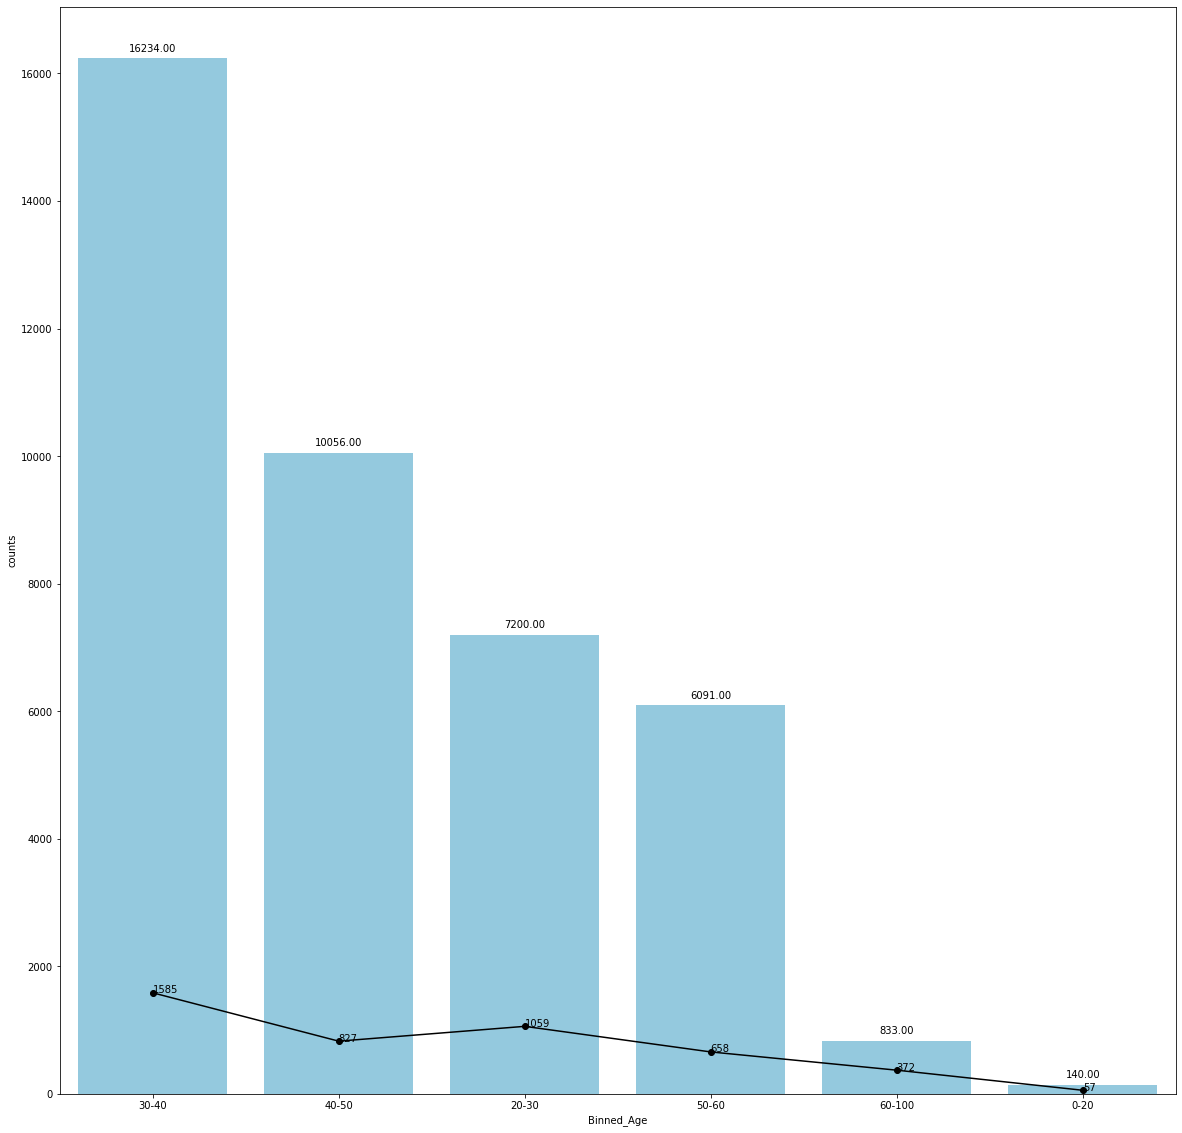

In [127]:
f, (ax1) = plt.subplots(1,1,figsize=(20, 20))
x_1 = pd.DataFrame(udf.Binned_Age.value_counts()).reindex(iage, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.Binned_Age)
x_2 = pd.DataFrame(udfyes.Binned_Age.value_counts()).reindex(iage, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.Binned_Age)
ax1.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax1.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax1)
splot.set(xlabel= 'Binned_Age', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')


In [128]:
udf=pd.get_dummies(udf,columns=['Binned_Age'])
#Get updated Shape
print(udf.shape)

(40554, 45)


In [129]:
#Scale the data and split
X = udf.drop(['y'], axis=1)
y=udf.y
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

<H3>Random Forest</H3><Br>
<B>For Random Forest Model with Scaled Data, Class weight method for Imbalanced Data Set worked will. Therefore we will be using this model </B>

In [130]:
#Use Randome Forest on updated data
rand_clf1 = RandomForestClassifier(class_weight={0:0.56365827,1:4.4272198})
rand_clf1.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf1.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print('Random Forest: f1-score=%.3f' % (f1))

Accuracy Score of Random Forest is 0.876615050793964
Random Forest: f1-score=0.351


In [131]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8549  467]
 [ 784  339]]


In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9016
           1       0.42      0.30      0.35      1123

    accuracy                           0.88     10139
   macro avg       0.67      0.63      0.64     10139
weighted avg       0.86      0.88      0.87     10139



44


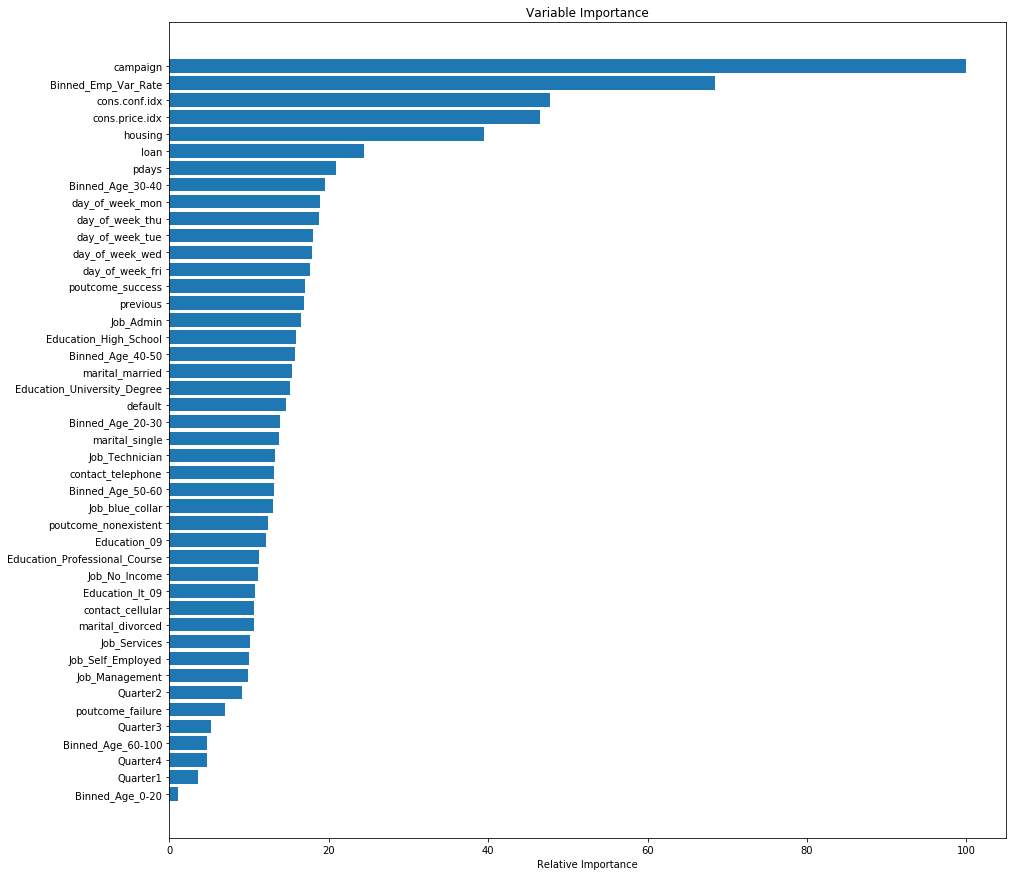

In [133]:
feature_importance = rand_clf1.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:50]
sorted_idx = np.argsort(feature_importance)[:50]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

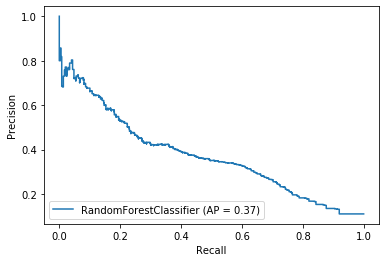

In [134]:
disp=plot_precision_recall_curve(rand_clf1, X_test, y_test)

In [135]:
#update the threshold and then predict the value
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(rand_clf1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Random Forest 0.8217772955912812


In [136]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7664 1352]
 [ 455  668]]


In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      9016
           1       0.33      0.59      0.43      1123

    accuracy                           0.82     10139
   macro avg       0.64      0.72      0.66     10139
weighted avg       0.88      0.82      0.84     10139



<h3>Logistic Regression</h3><br>
<b>For Logistic Regression we will use Scaled Data and "class weight" to balance data set

In [138]:
lr_clf2 = LogisticRegression(class_weight={0:0.56365827,1:4.4272198},max_iter=1000)
# Fit the model on the trainng data.
lr_clf2.fit(X_train, y_train)
y_pred=lr_clf2.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.8153664069434855


In [139]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7503 1513]
 [ 359  764]]


In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      9016
           1       0.34      0.68      0.45      1123

    accuracy                           0.82     10139
   macro avg       0.64      0.76      0.67     10139
weighted avg       0.89      0.82      0.84     10139



Logistic: f1=0.449 auc=0.481


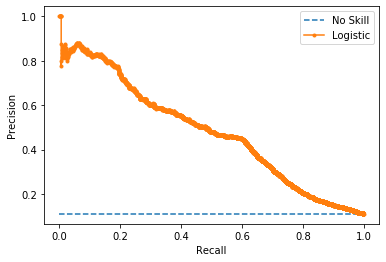

In [141]:
lr_probs=lr_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [142]:
#update the threshold and then predict the value
THRESHOLD = 0.58
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Random Forest 0.8688233553604892


In [143]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8124  892]
 [ 438  685]]


In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      9016
           1       0.43      0.61      0.51      1123

    accuracy                           0.87     10139
   macro avg       0.69      0.76      0.72     10139
weighted avg       0.89      0.87      0.88     10139



<B>SVM

In [145]:
X_ovr, y_ovr = sm.fit_resample(X_train,y_train)

In [146]:
clf_svm1 = svm()
clf_svm1.fit(X_ovr, y_ovr)
y_pred=clf_svm1.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.8102376960252491


In [147]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7445 1571]
 [ 353  770]]


In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      9016
           1       0.33      0.69      0.44      1123

    accuracy                           0.81     10139
   macro avg       0.64      0.76      0.67     10139
weighted avg       0.89      0.81      0.84     10139



<B>Ridge Regression

In [149]:
ridge=RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
print('Accuracy Score of Ridge Regression is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data using Oversampling and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score of Ridge Regression is 0.9025544925535063
[[8918   98]
 [ 890  233]]
Classifiaction Report after balancing the data using Oversampling and using Random Forest
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9016
           1       0.70      0.21      0.32      1123

    accuracy                           0.90     10139
   macro avg       0.81      0.60      0.63     10139
weighted avg       0.89      0.90      0.88     10139



<B>XG Boost

In [150]:
from xgboost import XGBClassifier
scale_pos_weight = 26980/3435
gbc = XGBClassifier(scale_pos_weight=scale_pos_weight)

In [151]:
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print('Accuracy Score of Xgboost is',accuracy_score(y_pred, y_test))

Accuracy Score of Xgboost is 0.83814971890719


In [152]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Xgboost\n',cm)

Confusion Matrix after updating class weight and using Xgboost
 [[7756 1260]
 [ 381  742]]


In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      9016
           1       0.37      0.66      0.47      1123

    accuracy                           0.84     10139
   macro avg       0.66      0.76      0.69     10139
weighted avg       0.89      0.84      0.86     10139



<h3>Hyper Parameter Tuning

<B>Before starting with hyperparameter tunnig let us sort variables we have for different approches

In [154]:
#X_train and y_train for clubbed features : X_train, y_train
#X_train and y_train for original features:X_train_bkp, y_train_bkp 

<B>Logistic Regression (Hyperparameter Tunnig)</B><br>
    For Logistic Regression model with clubbed features performed well, therefore we will implment hyperparameter tunnig on logistic regression and fit that data

In [155]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = {'C': Cs}
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(max_iter=1000,class_weight={0:0.56365827,1:4.4272198})
clf_cv=GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.8088443202367254


In [156]:
clf_best=LogisticRegression(C=1,max_iter=1000,class_weight={0:0.56365827,1:4.4272198})
clf_best.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 0.56365827, 1: 4.4272198},
                   max_iter=1000)

In [157]:
y_pred=clf_best.predict(X_test)
print('Accuracy Score of Final Logistic Regression Model is',accuracy_score(y_pred, y_test))

Accuracy Score of Final Logistic Regression Model is 0.8153664069434855


In [158]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Final Logistic Regression\n',cm)

Confusion Matrix for Final Logistic Regression
 [[7503 1513]
 [ 359  764]]


In [159]:
print('Classification Report for Final Logistic Regression Model is\n',classification_report(y_test, y_pred))

Classification Report for Final Logistic Regression Model is
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      9016
           1       0.34      0.68      0.45      1123

    accuracy                           0.82     10139
   macro avg       0.64      0.76      0.67     10139
weighted avg       0.89      0.82      0.84     10139



<B>Updating the threshold for Logistic Regression

In [160]:
THRESHOLD = 0.60
y_pred=clf_best.predict(X_test)
y_pred=np.where(clf_best.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)
f1 = f1_score(y_test, y_pred)
print('Logistic Regression: f1-score=%.3f' % (f1))

Confusion Matrix after updating class weight and using Logistic Regression
 [[8192  824]
 [ 450  673]]
Logistic Regression: f1-score=0.514


In [161]:
print('Classifiaction Report after updating class weight and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report after updating class weight and using Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      9016
           1       0.45      0.60      0.51      1123

    accuracy                           0.87     10139
   macro avg       0.70      0.75      0.72     10139
weighted avg       0.89      0.87      0.88     10139



In [162]:

#recall_score(y_test, y_pred)

<B>Random Forrest</B><br>
For Random Sampling model with undersampling performed well with no clubbed features, therefore we will be under sample original data and apply it to Randomforest Model

In [163]:
#Undersample Original Data
rus = RandomUnderSampler(random_state=42)
X_udr, y_udr = rus.fit_resample(X_train_bkp, y_train_bkp)

In [164]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] #this
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] #this
max_depth.append(None)
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] 
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [165]:
random_clf_best = RandomForestClassifier()
random_clf_best_cv=RandomizedSearchCV(random_clf_best,param_distributions = random_grid,scoring = 'f1', n_jobs = -1,cv=None)
random_clf_best_cv.fit(X_udr,y_udr)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='f1')

In [166]:
print("Tuned Random Forest Parameters: {}".format(random_clf_best_cv.best_params_))
print("Best score is {}".format(random_clf_best_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_estimators': 1200, 'max_features': 'sqrt', 'max_depth': 10}
Best score is 0.7080384991342579


In [171]:
#Use Randome Forest on updated data
rand_clsf_best = RandomForestClassifier(n_estimators=1200,max_features='sqrt',max_depth=10)
rand_clsf_best.fit(X_udr,y_udr)
# Print the accuracy from the testing data.
y_pred=rand_clsf_best.predict(X_test_bkp)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print('Random Forest: f1-score=%.3f' % (f1))

Accuracy Score of Random Forest is 0.8360785087286715
Random Forest: f1-score=0.473


In [172]:
cm = confusion_matrix(y_test_bkp, y_pred)
print('Confusion Matrix for Final Logistic Regression\n',cm)

Confusion Matrix for Final Logistic Regression
 [[7731 1285]
 [ 377  746]]


In [174]:
print('Classifiaction Report after updating class weight and using Logistic Regression\n',classification_report(y_test_bkp, y_pred))

Classifiaction Report after updating class weight and using Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      9016
           1       0.37      0.66      0.47      1123

    accuracy                           0.84     10139
   macro avg       0.66      0.76      0.69     10139
weighted avg       0.89      0.84      0.86     10139



In [190]:
#update the threshold and then predict the value
THRESHOLD = 0.65
#y_pred=clf.predict(X_test)
y_pred=np.where(rand_clsf_best.predict_proba(X_test_bkp)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test_bkp))

Accuracy Score by after balancing the data and using Random Forest 0.8786862609724825


In [182]:
cm = confusion_matrix(y_test_bkp, y_pred)
print('Confusion Matrix for Final Logistic Regression\n',cm)

Confusion Matrix for Final Logistic Regression
 [[8230  786]
 [ 444  679]]


In [183]:
print('Classifiaction Report after updating class weight and using Logistic Regression\n',classification_report(y_test_bkp, y_pred))

Classifiaction Report after updating class weight and using Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      9016
           1       0.46      0.60      0.52      1123

    accuracy                           0.88     10139
   macro avg       0.71      0.76      0.73     10139
weighted avg       0.90      0.88      0.89     10139



<B>Ridge Rigression</B><br>
Here for ridge classification best model performed was on scaled and original data and balancing data with cass weight

In [186]:
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [187]:
ridge_cv=RidgeClassifier(class_weight={0:0.56365827,1:4.4272198})
ridge_clf_cv = RandomizedSearchCV(ridge_cv,param_distributions = grid,scoring = 'f1', n_jobs = -1,cv=cv)
ridge_clf_cv.fit(X_train_bkp,y_train_bkp)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=RidgeClassifier(class_weight={0: 0.56365827,
                                                           1: 4.4272198}),
                   n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9, 1.0]},
                   scoring='f1')

In [189]:
print("Tuned Ridge Classifier Parameters: {}".format(ridge_clf_cv.best_params_))
print("Best score is {}".format(ridge_clf_cv.best_score_))

Tuned Ridge Classifier Parameters: {'alpha': 0.1}
Best score is 0.42814094278543435


In [197]:
ridge_best_clf_cv=RidgeClassifier(class_weight={0:0.56365827,1:4.4272198},alpha=0.1)
ridge_best_clf_cv.fit(X_train_bkp, y_train_bkp)
y_pred=ridge_best_clf_cv.predict(X_test_bkp)
print('Accuracy Score of Ridge Regression is',accuracy_score(y_pred, y_test_bkp))

Accuracy Score of Ridge Regression is 0.8129993095966072


In [198]:
cm = confusion_matrix(y_test_bkp, y_pred)
print('Confusion Matrix for Final Logistic Regression\n',cm)

Confusion Matrix for Final Logistic Regression
 [[7486 1530]
 [ 366  757]]


In [199]:
print('Classifiaction Report after updating class weight and using Logistic Regression\n',classification_report(y_test_bkp, y_pred))

Classifiaction Report after updating class weight and using Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      9016
           1       0.33      0.67      0.44      1123

    accuracy                           0.81     10139
   macro avg       0.64      0.75      0.67     10139
weighted avg       0.88      0.81      0.84     10139



<B>SVM</B> <br>
SVM worked well on clubbed features data set and balancing data with oversampling. 

In [211]:
param_grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'loss': ['log','hinge'], # logistic regression,
    'penalty': ['l2']
}

In [212]:
svm_cv=svm()
svm_clf_cv =GridSearchCV(svm_cv,param_grid,cv=5)
svm_clf_cv.fit(X_ovr,y_ovr)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0],
                         'loss': ['log', 'hinge'], 'penalty': ['l2']})

In [213]:
print("Tuned Ridge Classifier Parameters: {}".format(svm_clf_cv.best_params_))
print("Best score is {}".format(svm_clf_cv.best_score_))

Tuned Ridge Classifier Parameters: {'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}
Best score is 0.741160118606375


In [214]:
svm_best_clf_cv = svm(alpha=0.01,loss= 'log', penalty= 'l2')
svm_best_clf_cv.fit(X_ovr, y_ovr)
y_pred=svm_best_clf_cv.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.8075747115100108


In [215]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Final Logistic Regression\n',cm)

Confusion Matrix for Final Logistic Regression
 [[7423 1593]
 [ 358  765]]


In [216]:
print('Classifiaction Report after updating class weight and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report after updating class weight and using Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      9016
           1       0.32      0.68      0.44      1123

    accuracy                           0.81     10139
   macro avg       0.64      0.75      0.66     10139
weighted avg       0.88      0.81      0.83     10139



<B>XG Boost </B> <br>
XGBoost performed best on scaled original data, where imbalance data was handled by Scale Position Weight 

In [217]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
param_dist = {'n_estimators': n_estimators,
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9]
             }

In [218]:
clf_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 10, 
                             scoring = 'f1', n_jobs = -1,cv=None)

In [219]:
xgb_clf.fit(X_train_bkp, y_train_bkp)

RandomizedSearchCV(estimator=XGBClassifier(scale_pos_weight=7.854439592430859),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D65A886B48>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D65A84B848>},
                   scoring='f1')

In [227]:
print("Tuned XGboost Parameters: {}".format(xgb_clf.best_params_))
print("Best score is {}".format(xgb_clf.best_score_))

Tuned XGboost Parameters: {'learning_rate': 0.03512530075230746, 'max_depth': 9, 'n_estimators': 400, 'subsample': 0.45609232557844703}
Best score is 0.44017559303074416


In [221]:
best_clf_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight,
                             learning_rate= 0.03512530075230746, 
                             max_depth= 9, 
                             n_estimators= 400, 
                             subsample= 0.45609232557844703)

In [224]:
best_clf_xgb.fit(X_train_bkp, y_train_bkp)
y_pred=best_clf_xgb.predict(X_test_bkp)
print('Accuracy Score of Xgboost is',accuracy_score(y_pred, y_test_bkp))
f1 = f1_score(y_test, y_pred)
print('XGBoost: f1-score=%.3f' % (f1))

Accuracy Score of Xgboost is 0.8564947233454976
Logistic Regression: f1-score=0.461


In [225]:
cm = confusion_matrix(y_test_bkp, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[8063  953]
 [ 502  621]]


In [229]:
print(classification_report(y_test_bkp, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      9016
           1       0.39      0.55      0.46      1123

    accuracy                           0.86     10139
   macro avg       0.67      0.72      0.69     10139
weighted avg       0.88      0.86      0.87     10139



In [ ]:
clf = LogisticRegression(max_iter=1000,class_weight={0:0.56365827,1:4.4272198})
clf_cv=GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X_train, y_train)

In [ ]:
clf = RandomForestClassifier()
clf_cv=GridSearchCV(clf,random_grid,cv=5)

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] #this
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] 
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] #this
max_depth.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

<B>KNN

In [ ]:
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
#knn_cv.fit(X_train,y_train)
#print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
#print("Best score is {}".format(knn_cv.best_score_))

In [ ]:
#knn_cv.fit(X_train,y_train)

In [ ]:
#print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
#print("Best score is {}".format(knn_cv.best_score_))

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=30)
#knn.fit(X_train, y_train)

In [ ]:
#y_pred=knn.predict(X_test)
#print('Accuracy Score without scaling the data and using KNN',accuracy_score(y_pred, y_test))
#f1 = f1_score(y_test, y_pred, average='weighted')
#print('KNN: f1-score=%.3f' % (f1))

In [ ]:
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

In [ ]:
#print('Classification Report after scaling the data and using KNN\n',classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] #this
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] 
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] #this
max_depth.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}